# Import

In [1]:
import os
import subprocess
import zipfile

from PIL import Image
import random

import matplotlib.pyplot as plt

# Download Data Test

In [2]:
data_folder = "data"

In [3]:
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

In [4]:
# URL et en-têtes
url = "https://nextcloud.its-tps.fr/s/C74teyoWFiJ3AD9/download?path=%2F2024%20-%202025%2FP%C3%B4le%20Photo%2FFouaille&files=24_10_09%20Soir%C3%A9e%20oeno&downloadStartSecret=nzfa2cu88b"
headers = [
    "-H", "User-Agent: Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:132.0) Gecko/20100101 Firefox/132.0",
    "-H", "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
    "-H", "Accept-Language: fr,fr-FR;q=0.8,en-US;q=0.5,en;q=0.3",
    "-H", "Accept-Encoding: gzip, deflate, br, zstd",
    "-H", "Alt-Used: nextcloud.its-tps.fr",
    "-H", "Connection: keep-alive",
    "-H", "Cookie: oc_sessionPassphrase=%2BSZok3haPlgMbGxZJa5pCqSJqQBTfXXUqOYMT0mRgEdDxhBSXQ9ISC8xDXKQxHytaBaKyMfJRMyoOamRTQOejid3z7Z6ZnRtjc%2FoMwb5rv7bigPl2je%2BAURYfpN8E9GN; __Host-nc_sameSiteCookielax=true; __Host-nc_sameSiteCookiestrict=true; ocdxims0hloq=3fb760b2e16d1dda4a5be95f73d03979",
    "-H", "Upgrade-Insecure-Requests: 1",
    "-H", "Sec-Fetch-Dest: document",
    "-H", "Sec-Fetch-Mode: navigate",
    "-H", "Sec-Fetch-Site: same-origin",
    "-H", "Sec-Fetch-User: ?1",
    "-H", "Priority: u=0, i",
    "-H", "TE: trailers",
]

# Si cette commande ne marche pas, importer directement le dossier d'une soirée au hasard dans le dossier data qui vient d'être crée

In [5]:
output_file = os.path.join(data_folder, "exemple_soiree.zip")

In [10]:
try:
    # Exécution de la commande curl
    subprocess.run(["curl", "-o", output_file, url] + headers, check=True)
    print(f"Le fichier a été téléchargé avec succès dans : {output_file}")
except subprocess.CalledProcessError as e:
    print(f"Erreur lors du téléchargement : {e}")

Le fichier a été téléchargé avec succès dans : data\exemple_soiree.zip


# Dé-zip Data Test

In [11]:
# Vérifier si le fichier est un ZIP
if zipfile.is_zipfile(output_file):
    print("Décompression du fichier ZIP...")
    with zipfile.ZipFile(output_file, 'r') as zip_ref:
        zip_ref.extractall(data_folder)
    print(f"Fichiers extraits dans : {data_folder}")
    
    # Supprimer le fichier ZIP
    os.remove(output_file)
    print("Fichier ZIP supprimé.")
else:
    print("Le fichier téléchargé n'est pas un ZIP, aucune décompression effectuée.")

Le fichier téléchargé n'est pas un ZIP, aucune décompression effectuée.


# Visualisation d'une image au hasard

In [12]:
# Trouver les fichiers JPG dans le dossier et ses sous-dossiers
jpg_files = []
for root, dirs, files in os.walk(data_folder):
    for file in files:
        if file.lower().endswith('.jpg'):
            jpg_files.append(os.path.join(root, file))

Affichage de l'image : data\24_10_09 Soirée oeno\24_10_09 Soirée oeno\IMG_2731.JPG


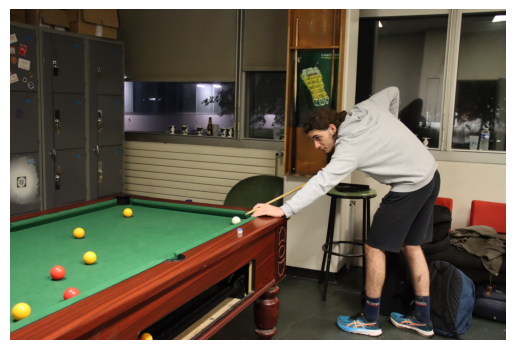

In [14]:
# Vérifier s'il y a des images
if not jpg_files:
    print("Aucune image JPG trouvée dans le dossier.")
else:
    # Choisir une image au hasard
    random_image = random.choice(jpg_files)
    print(f"Affichage de l'image : {random_image}")
    
    # Charger l'image
    img = Image.open(random_image)
    
    # Afficher l'image avec Matplotlib
    plt.imshow(img)
    plt.axis('off')  # Désactiver les axes
    plt.show()